In [1]:
%pylab inline
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# import fmt

Populating the interactive namespace from numpy and matplotlib


# Homework Set 1

## Problem 1:

Set up your Python and IPython notebook environment and show case the following IPython functionalities:

2. use ? or help() to show comments (docstring) of a python function
3. use %pdb to debug the following code, show how to print out the value of b inside function bug() using the debugger

In [4]:
%pdb on

def div(a, b):
    """test docstring"""
    return a/b

def bug(a, b):
    %debug
    return div(a, b)

bug(3, 0)

Automatic pdb calling has been turned ON
> /Users/jeffzang/workspace/miniconda3/envs/sciComp/lib/python3.6/site-packages/IPython/core/interactiveshell.py(2271)run_line_magic()
   2269             extra = '' if cm is None else (' (But cell magic `%%%%%s` exists, '
   2270                                     'did you mean that instead?)' % magic_name )
-> 2271             raise UsageError(etpl % (magic_name, extra))
   2272         else:
   2273             # Note: this is the distance in the stack to the user's frame.

ipdb> n


ZeroDivisionError: division by zero

> <ipython-input-4-00d9d22660db>(5)div()
      3 def div(a, b):
      4     """test docstring"""
----> 5     return a/b
      6 
      7 def bug(a, b):

ipdb> p b
0
ipdb> q


In [5]:
div?
help(div)

Help on function div in module __main__:

div(a, b)
    test docstring



## Problem 2:

For the first term of the conditional variance expression of the CIR process discused in the class:

$$f(\kappa) = \frac{r_0\sigma^2}{\kappa}(e^{-\kappa t} - e^{-2\kappa t})$$

1. compute its condition number, assuming $\kappa$ is the only variable, comment on whether the computation is stable around $\kappa = 0$
2. implement a function to compute the above expression, which is numerically stable around $\kappa = 0$. A typical approach is to switch to an approximation when $\kappa$ is smaller than a threshold $h$. Explain your choice of $h$, is the $h$ different for double or single precision calculation?  

1. The condition number is computed to be $$ \left\vert 1 + \kappa t\frac{2 - e^{kt}}{1 -e^{kt}} \right\vert. $$
When $\kappa$ is around 0, the condition number is 0, which means the problem is well-posed but this doesn't necessarily mean $f(\kappa)$ is numerically stable around $\kappa = 0$. In fact $f(\kappa)$ is *unstable* around $\kappa=0$ due to catastrophic cancellation caused by $(e^{-\kappa t} - e^{-2\kappa t})$.

Note that when $x \rightarrow 0$, $e^{x}$ can be approximated by $1+x$ when $x^2/2 < l$ where $l$ is the machine precision. Therefore, when $(\kappa t)^2 < 2p$ or $\kappa < \sqrt{2p} / t$, $f(\kappa)$ can be approximated by $$\frac{r_0\sigma^2}{\kappa}[(1-\kappa t) - (1 -2\kappa t)] = r_0\sigma^2 t.$$
Here $p$ is the machine precision and $p_{\text{double}} = 1.1102\cdot 10^{-16}$ and $p_{\text{single}} = 5.9605\cdot 10^{-8}$.

## Problem 3:

Implement a matrix product function using hand coded loops in python, please feel free to use numpy array and numpy vector multiplications, but obviously you should not just call numpy matrix multiplication.

Compare the speed of your implementation to the numpy matrix product version, plot the difference in computational time with the size of the matrix.


Hint: 

* %timeit is a useful timing tool in IPython, or you can use time.clock() function
* numpy has two ways of representing matrix, one is array of arrays, another is matrix type. For array types, the matrix production is ```a.dot(b)```, for matrix type, the matrix production is ```a*b```. We recommend you to stick with array type to avoid any potential confusions. The ```a*b``` on array type is element wise multiplication. A common mistake is to use ```a*b``` for matrix production on array type. Please see the following code section as an example.
* numpy.allclose is a useful function to compare floating point calculation results


In [6]:
def matrix_multiply(matrix1, matrix2):
    if not isinstance(matrix1, np.ndarray):
        raise ValueError('matrix1 needs to be an numpy array.')
    if not isinstance(matrix2, np.ndarray):
        raise ValueError('matrix2 needs to be an numpy array.')
    row1, col1 = matrix1.shape
    row2, col2 = matrix2.shape
    if col1 != row2:
        raise ValueError('Incompatible matrices')
    result = np.empty(shape=(row1, col2))
    for i in range(row1):
        for j in range(col2):
            result[i][j] = matrix1[i].dot(matrix2[:, j])
    return result

In [7]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = a + 1
print("a=\n", a)
print("\nb=\n", b)
c = a.dot(b) # matrix product
d = a*b #elment wise multiplication

print("\nc=a.dot(b)\n", c)
print("\nd=a*b\n", d)

a=
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

b=
 [[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]]

c=a.dot(b)
 [[ 36  42  48]
 [ 81  96 111]
 [126 150 174]]

d=a*b
 [[ 2  6 12]
 [20 30 42]
 [56 72 90]]


In [8]:
np.allclose(c, matrix_multiply(a, b))

True

In [9]:
%%timeit
matrix_multiply(a, b)

16.3 µs ± 169 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [10]:
%%timeit
a.dot(b)

950 ns ± 31.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [11]:
from numpy.random import rand
from timeit import timeit

time_slow = []
time_fast = []

for i in range(2, 15):
    matrix1 = rand(i, i)
    matrix2 = rand(i, i)
    time_slow.append(timeit('matrix_multiply(matrix1, matrix2)', globals=globals(), number=1000))
    time_fast.append(timeit('matrix1.dot(matrix2)', globals=globals(), number=1000))

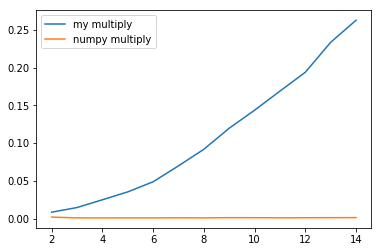

In [12]:
plt.figure()
plt.plot(range(2, 15), time_slow, label='my multiply')
plt.plot(range(2, 15), time_fast, label='numpy multiply')
plt.legend()
plt.show()

## Book problems (from Goodman and Bindel Book)

### 2.8

Hint: 

* The extra credit part of this problem is rather involved, you are encouraged to try but there is no need to spend too much time.
* In python, floating point numbers are double precision by default, but you can force them to be single precision by calling numpy.float32, please see the following example:

In [13]:
a = np.float32(1.)
b = np.float64(1.)

print(type(a), type(b))

<class 'numpy.float32'> <class 'numpy.float64'>


In [14]:
UPPER_BOUND = 75

In [15]:
fibs = [a, a]
while len(fibs) < UPPER_BOUND:
    fibs.append(fibs[-1] + fibs[-2])

In [16]:
c = 1 + 3**0.5 / 100
pibs = [a, a]
while len(pibs) < UPPER_BOUND:
    pibs.append(c * pibs[-1] + pibs[-2])

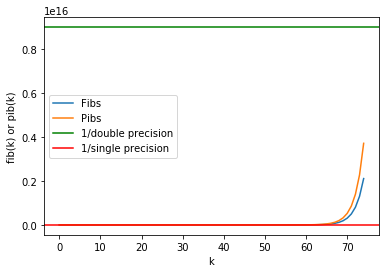

In [17]:
plt.figure()
plt.plot(range(UPPER_BOUND), fibs, label='Fibs')
plt.plot(range(UPPER_BOUND), pibs, label='Pibs')
plt.axhline(1/1.1102*10**16, label='1/double precision', color='g')
plt.axhline(1/5.9605*10**8, label='1/single precision', color='r')
plt.xlabel('k')
plt.ylabel('fib(k) or pib(k)')
plt.legend()
plt.show()

In [18]:
def calculate_f0(N, initial_val=1.0):
    fibs = [initial_val, initial_val]
    while len(fibs) < N:
        fibs.append(fibs[-1] + fibs[-2])

    fibs2 = fibs[:-3:-1]
    while len(fibs2) < N:
        fibs2.append(fibs2[-2] - fibs2[-1])
    return fibs2[-1]

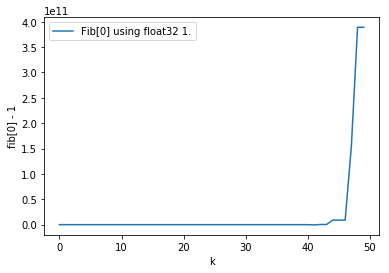

1.0
-9227464.0


In [19]:
UPPER_BOUND = 50
plt.figure()
plt.plot(range(UPPER_BOUND), [calculate_f0(n, a) - 1. for n in range(UPPER_BOUND)], label='Fib[0] using float32 1.')
plt.xlabel('k')
plt.ylabel('fib[0] - 1')
plt.legend()
plt.show()
print(calculate_f0(36, a))
print(calculate_f0(37, a))

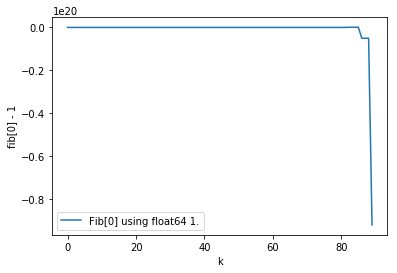

1.0
-5527939700884756.0


In [20]:
UPPER_BOUND = 90
plt.figure()
plt.plot(range(UPPER_BOUND), [calculate_f0(n, b) - 1. for n in range(UPPER_BOUND)], label='Fib[0] using float64 1.')
plt.xlabel('k')
plt.ylabel('fib[0] - 1')
plt.legend()
plt.show()
print(calculate_f0(78, b))
print(calculate_f0(79, b))

As we can see from the graphs above: for float32 calculations, $f_0$ loses accuracy when N > 36; for float64 calculations, $f_0$ loses accuracy when N > 78. The result of float64 is 2 times the result of float32.

In [21]:
# c = 1 + 3**0.5 / 100
def calculate_p0(N, c=1 + 3**0.5 / 100, initial_val=1.0):
    pibs = [initial_val, initial_val]
    while len(pibs) < N:
        pibs.append(c * pibs[-1] + pibs[-2])

    pibs2 = pibs[:-3:-1]
    while len(pibs2) < N:
        pibs2.append(pibs2[-2] - c * pibs2[-1])
    return pibs2[-1]

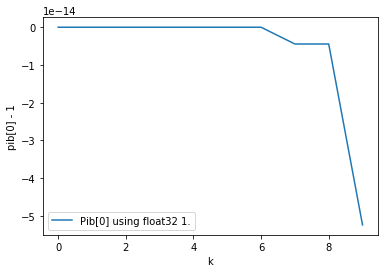

1.0
0.9999999999999956


In [22]:
UPPER_BOUND = 10
plt.figure()
plt.plot(range(UPPER_BOUND), [calculate_p0(n, a + (3*a)**(0.5*a) / (100*a), a) - 1. for n in range(UPPER_BOUND)], label='Pib[0] using float32 1.')
plt.xlabel('k')
plt.ylabel('pib[0] - 1')
plt.legend()
plt.show()
print(calculate_p0(6, a + (3*a)**(0.5*a) / (100*a), a))
print(calculate_p0(7, a + (3*a)**(0.5*a) / (100*a), a))

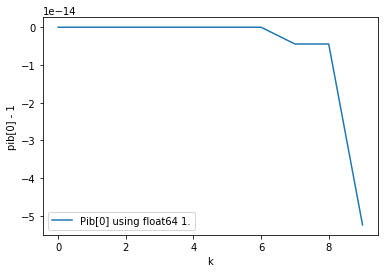

1.0
0.9999999999999956


In [23]:
UPPER_BOUND = 10
plt.figure()
plt.plot(range(UPPER_BOUND), [calculate_p0(n, 1 + 3**0.5 / 100, b) - 1. for n in range(UPPER_BOUND)], label='Pib[0] using float64 1.')
plt.xlabel('k')
plt.ylabel('pib[0] - 1')
plt.legend()
plt.show()
print(calculate_p0(6, 1 + 3**0.5 / 100, b))
print(calculate_p0(7, 1 + 3**0.5 / 100, b))

For both float32 and float64 calculations, p0 loses accuracy when N reaches 7. Precision loss when calculating f0 is due to integer overflow, whereas precision loss when calculating p0 is due to machine precision limit in floating point calculations. The second way is more typical because it is less obvious.